In [9]:
# Simple 4f Optical System using Chromatix
# A 4f system consists of two lenses separated by the sum of their focal lengths
# This creates a unity magnification imaging system

import sys
import os
from pathlib import Path

# Add the src directory to Python path to import from local development version
# This allows us to use the chromatix library from src/ instead of installed version
repo_root = Path.cwd().parent.parent if 'docs' in str(Path.cwd()) else Path.cwd()
src_path = repo_root / 'src'
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))
    print(f"Added {src_path} to Python path")

import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from functools import partial

# Import chromatix components from local source
from chromatix.elements import PlaneWave, FFLens, BasicSensor, Propagate, ThinLens
from chromatix.elements.sources import GaussianPlaneWave
from chromatix.elements.lenses import FDLens, DFLens
from chromatix.elements.sensors import BasicSensor
from chromatix.systems import OpticalSystem
import chromatix.functional as cf

print("Importing from local chromatix source code...")

# Set up the optical parameters
shape = (512, 512)       # Field size in pixels
dx = 0.3                 # Pixel spacing in microns
spectrum = 0.532         # Wavelength in microns (green light)
spectral_density = 1.0   # Spectral weight
f = 50.0               # Focal length in microns
n = 1.0                 # Refractive index (air)

print("Setting up a simple 4f optical system...")
print(f"Field size: {shape}")
print(f"Pixel spacing: {dx} µm")
print(f"Wavelength: {spectrum} µm")
print(f"Focal length: {f} µm")

input_field = cf.gaussian_plane_wave(
    shape=shape,
    dx=dx,
    spectrum=spectrum,
    spectral_density=spectral_density,
    waist=30
    )

Importing from local chromatix source code...
Setting up a simple 4f optical system...
Field size: (512, 512)
Pixel spacing: 0.3 µm
Wavelength: 0.532 µm
Focal length: 50.0 µm


In [35]:
# Create a simple 4f optical system
# The system consists of:
# 1. PlaneWave source (with a square aperture to make it more interesting)
# 2. First FFLens (propagates f and applies lens)
# 3. Second FFLens (completes the 4f system)
# 4. BasicSensor (to capture the final image)
def parametric_system(param):
    
    system = OpticalSystem([

        # Input: Plane wave with a square aperture
        GaussianPlaneWave(
        shape=shape,
        dx=dx,
        spectrum=spectrum,
        spectral_density=spectral_density,
        waist=30
        ),
        
        # First lens: FFLens propagates by focal length f and applies the lens
        FFLens(f=f, n=n),
        
        # Second lens: Another FFLens to complete the 4f system
        #FFLens(f=f, n=n),

        Propagate(z=f, n=n),

        ThinLens(f=f, n=n),

        Propagate(z=param, n=n),

        #FDLens(f=f, d=param, n=n),
        
        # Output sensor
        BasicSensor(
            shape=shape,
            spacing=dx,
            reduce_axis=0  # Sum over spectral axis
        )
    ])

    key = random.PRNGKey(42)
    variables = system.init(key)
    output_image = system.apply(variables)

    return output_image

    
print("4f optical system created with:")
print("- Plane wave source with square aperture")
print("- Two FFLenses with equal focal lengths")
print("- Basic sensor for detection")


4f optical system created with:
- Plane wave source with square aperture
- Two FFLenses with equal focal lengths
- Basic sensor for detection


In [36]:
o_08 = parametric_system(0.0*f)
o_09 = parametric_system(0.2*f) 
o_ideal = parametric_system(f)
o_1 = parametric_system(1.8*f)
o_2 = parametric_system(3*f)

#print(f"Output image shape: {output_image.shape}")
#print(f"Output image type: {type(output_image)}")


In [37]:
def plot_results(output_image, input_field):  
    # Visualize the results
    plt.figure(figsize=(12, 4))

    # Plot input field intensity
    plt.subplot(1, 3, 1)
    plt.imshow(input_field.intensity.squeeze(), cmap='afmhot')
    plt.title('Input Field\n(Plane wave with square aperture)')
    plt.colorbar()
    plt.axis('off')

    # Plot input field phase
    plt.subplot(1, 3, 2)
    plt.imshow(input_field.phase.squeeze(), cmap='hsv')
    plt.title('Input Phase')
    plt.colorbar()
    plt.axis('off')

    # Plot output intensity
    plt.subplot(1, 3, 3)
    plt.imshow(output_image.squeeze(), cmap='afmhot')
    plt.title('4f System Output\n(Unity magnification)')
    plt.colorbar()
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("4f System Analysis:")
    print(f"Input field power: {input_field.power.squeeze():.6f}")
    print(f"Output image max: {jnp.max(output_image):.6f}")
    print(f"Output image min: {jnp.min(output_image):.6f}")
    print("\nThe 4f system should preserve the spatial structure of the input field.")
    print("With equal focal lengths, we get unity magnification and no inversion.")

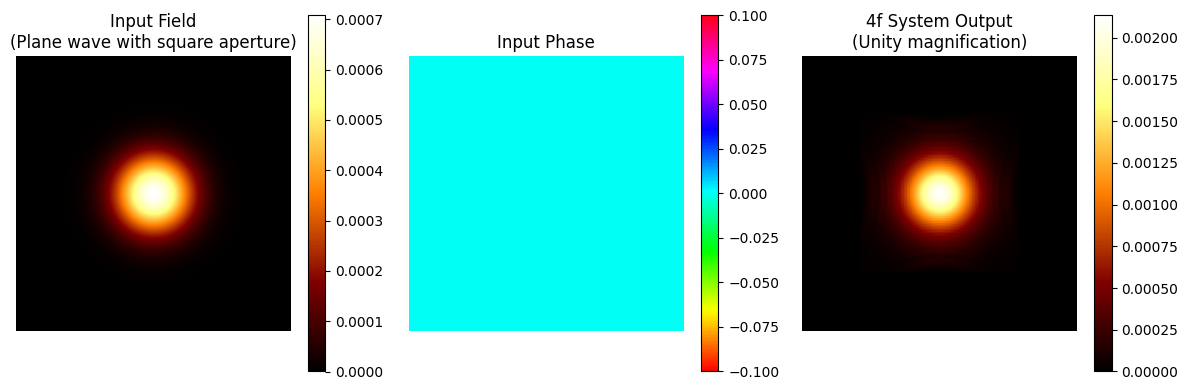

4f System Analysis:
Input field power: 1.000001
Output image max: 0.002133
Output image min: 0.000000

The 4f system should preserve the spatial structure of the input field.
With equal focal lengths, we get unity magnification and no inversion.


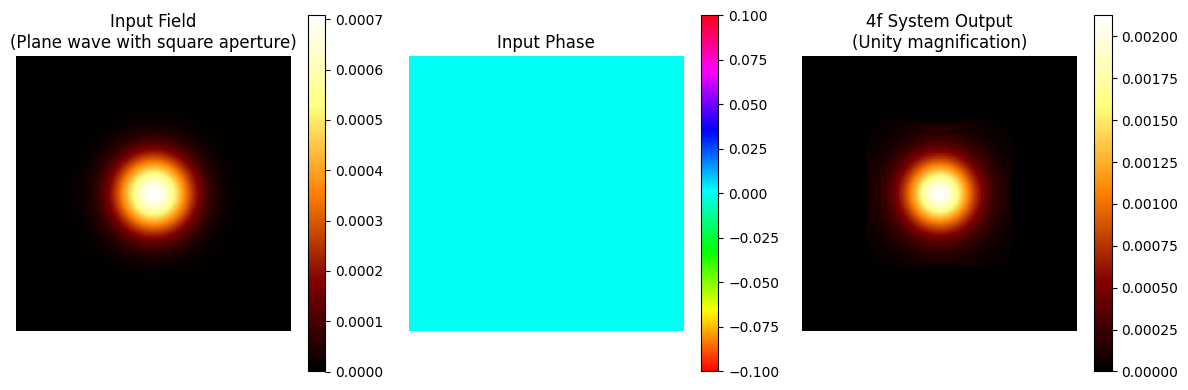

4f System Analysis:
Input field power: 1.000001
Output image max: 0.002125
Output image min: 0.000000

The 4f system should preserve the spatial structure of the input field.
With equal focal lengths, we get unity magnification and no inversion.


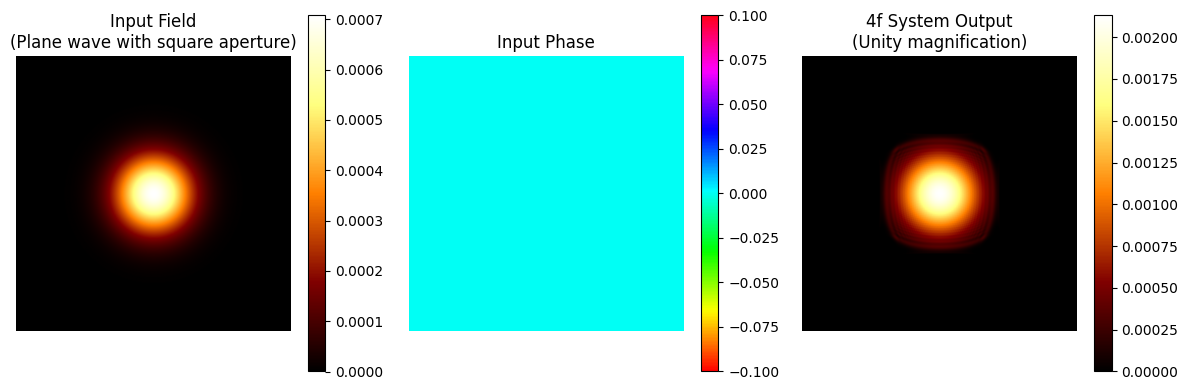

4f System Analysis:
Input field power: 1.000001
Output image max: 0.002130
Output image min: 0.000000

The 4f system should preserve the spatial structure of the input field.
With equal focal lengths, we get unity magnification and no inversion.


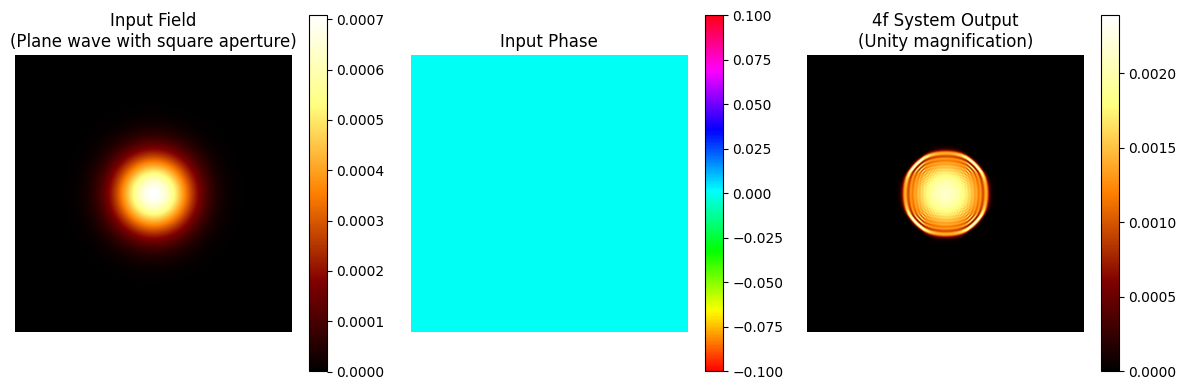

4f System Analysis:
Input field power: 1.000001
Output image max: 0.002387
Output image min: 0.000000

The 4f system should preserve the spatial structure of the input field.
With equal focal lengths, we get unity magnification and no inversion.


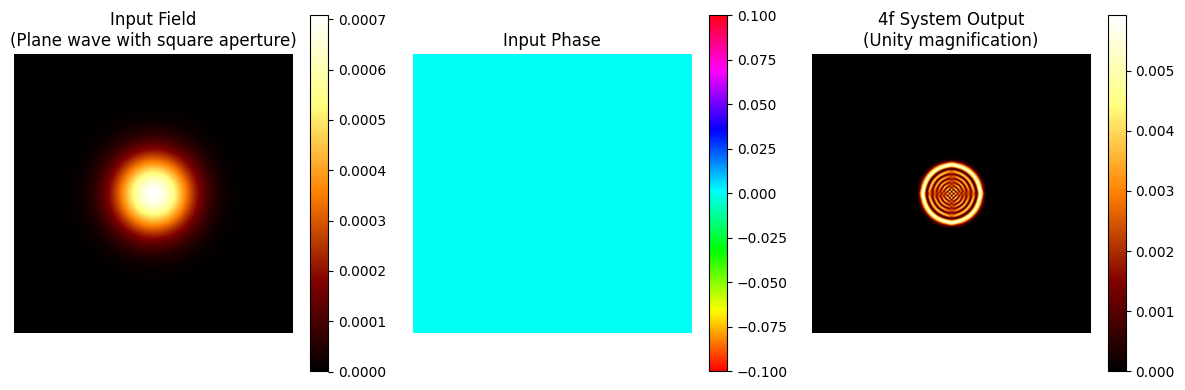

4f System Analysis:
Input field power: 1.000001
Output image max: 0.005917
Output image min: 0.000000

The 4f system should preserve the spatial structure of the input field.
With equal focal lengths, we get unity magnification and no inversion.


In [38]:
plot_results(o_08, input_field)
plot_results(o_09, input_field)
plot_results(o_ideal, input_field)
plot_results(o_1, input_field)
plot_results(o_2, input_field)


In [15]:
# Step-by-step 4f system using functional approach
print("Building 4f system step by step...\n")

# Step 1: Create input field (plane wave with aperture)
field_input = cf.plane_wave(
    shape=shape,
    dx=dx,
    spectrum=spectrum,
    spectral_density=spectral_density,
    pupil=partial(cf.square_pupil, w=50.0)
)
print(f"Step 1 - Input field power: {field_input.power.squeeze():.6f}")

# Step 2: Apply first lens (FFLens = propagate f + lens + propagate f)
field_after_lens1 = cf.ff_lens(field_input, f=f, n=n)
print(f"Step 2 - After first lens power: {field_after_lens1.power.squeeze():.6f}")

# Step 3: Apply second lens
field_after_lens2 = cf.ff_lens(field_after_lens1, f=f, n=n)
print(f"Step 3 - After second lens power: {field_after_lens2.power.squeeze():.6f}")

# Step 4: Extract intensity (what a sensor would see)
final_intensity = field_after_lens2.intensity.squeeze()
print(f"Step 4 - Final intensity max: {jnp.max(final_intensity):.6f}")

print(f"\nTotal system length: {4*f} µm (2f + 2f)")
print("This is a classic 4f optical system configuration.")


Building 4f system step by step...

Step 1 - Input field power: 0.999989
Step 2 - After first lens power: 1.000001
Step 3 - After second lens power: 0.999990
Step 4 - Final intensity max: 0.000398

Total system length: 200.0 µm (2f + 2f)
This is a classic 4f optical system configuration.


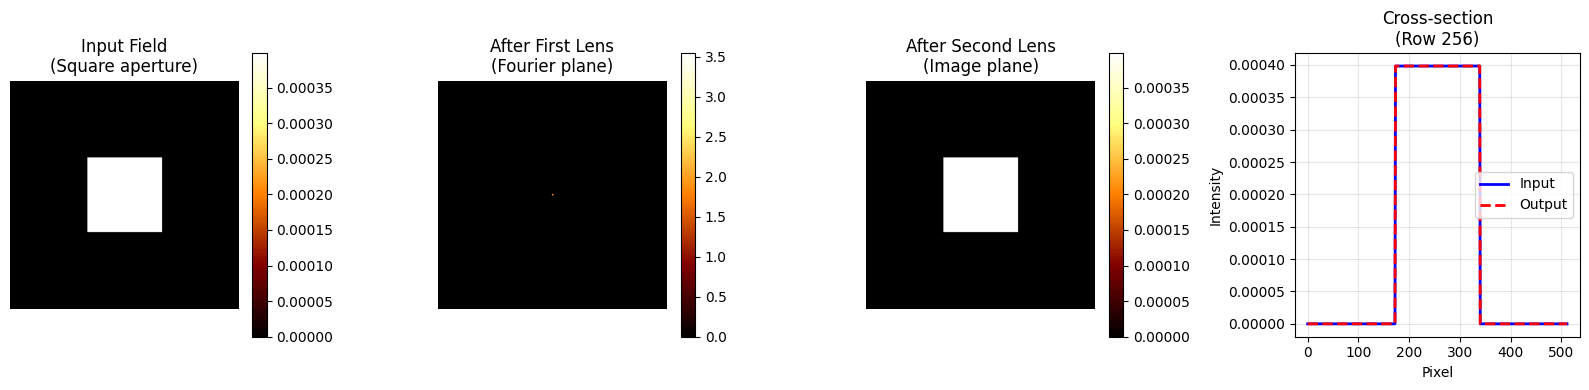

The 4f system performs a double Fourier transform:
Input → First lens (FT) → Fourier plane → Second lens (FT) → Output
This results in the input being reproduced at the output (with potential inversion).


In [16]:
# Visualize the step-by-step progression
plt.figure(figsize=(16, 4))

# Input field
plt.subplot(1, 4, 1)
plt.imshow(field_input.intensity.squeeze(), cmap='afmhot')
plt.title('Input Field\n(Square aperture)')
plt.colorbar()
plt.axis('off')

# After first lens (Fourier plane)
plt.subplot(1, 4, 2)
plt.imshow(field_after_lens1.intensity.squeeze(), cmap='afmhot')
plt.title('After First Lens\n(Fourier plane)')
plt.colorbar()
plt.axis('off')

# After second lens (Image plane)
plt.subplot(1, 4, 3)
plt.imshow(field_after_lens2.intensity.squeeze(), cmap='afmhot')
plt.title('After Second Lens\n(Image plane)')
plt.colorbar()
plt.axis('off')

# Comparison of input and output
plt.subplot(1, 4, 4)
plt.plot(field_input.intensity.squeeze()[256, :], 'b-', label='Input', linewidth=2)
plt.plot(final_intensity[256, :], 'r--', label='Output', linewidth=2)
plt.title('Cross-section\n(Row 256)')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("The 4f system performs a double Fourier transform:")
print("Input → First lens (FT) → Fourier plane → Second lens (FT) → Output")
print("This results in the input being reproduced at the output (with potential inversion).")
